In [1]:
# system imports
import os
from typing import cast

import reload
import torch
from PIL import Image
from torchvision import transforms


In [2]:
# user imports
from money_counter import (constants, data, engine, models, training, utils,
                           validation_utils, prediction)
%reload money_counter


In [3]:
device = utils.get_device()
print(device)


cuda


In [4]:
data_loader_train, data_loader_test = data.get_data_loaders(
    os.environ['COINS_DATASET_PATH'], test_percentage=0.05)


In [5]:
model, model_name = models.get_fasterrcnn_v2_pretrained()
version_manager = models.VersionManager('../model_state')
version_manager.load_model(model_name, model, mode="best")


(70, 3.248028741840936)

In [6]:
# Convert image from tensor to PIL image
def tensor_to_pil_image(image: torch.Tensor) -> Image.Image:
    image = image.cpu().clone()
    image = image.squeeze(0)
    image = transforms.ToPILImage()(image)
    return cast(Image.Image, image)


In [7]:
def resize_by(image: Image.Image, factor: int):
	return image.resize((image.width // factor, image.height // factor))

In [8]:
image, target = data_loader_test.dataset[0]
image = tensor_to_pil_image(image)


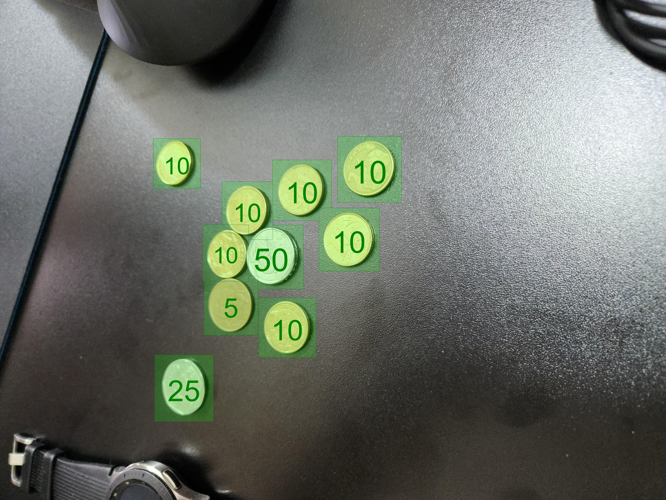

In [9]:
%reload money_counter

target['boxes'][0]

resize_by(validation_utils.show_prediction(image, constants.CLASSES, target=target), 6)


In [10]:
predictor = prediction.Predictor(model, model_name)
predicted = predictor.predict(image)


In [11]:
predicted['scores'][0]

tensor(0.3500, device='cuda:0')

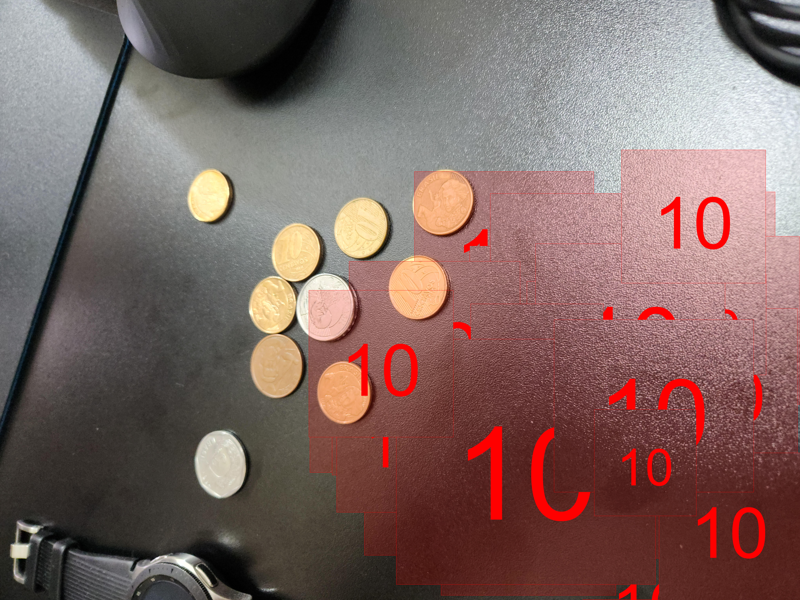

In [14]:
resize_by(validation_utils.show_prediction(image, constants.CLASSES, predicted=predicted), 5)

In [9]:
# engine.evaluate(model, data_loader_test, device=device)
# epochs = version_manager.get_epochs(model_name)
# for [epoch_number, _] in reversed(epochs):
#     version_manager.load_model(model_name, model, epoch=epoch_number)

#     model.to(device).eval()
#     engine.evaluate(model, data_loader_test, device=device)


KeyboardInterrupt: 